In [2]:
import pandas as pd
#url = 'https://raw.githubusercontent.com/stesstesste/SICSS_2024/main/test_day/example_data_probabilities_new.csv'
url = 'https://raw.githubusercontent.com/stesstesste/SICSS_2024/main/data_probabilities/2023_data_probabilities.csv'
df = pd.read_csv(url)
url2 = 'https://raw.githubusercontent.com/stesstesste/SICSS_2024/main/data_probabilities/2022_data_probabilities.csv'
df2 = pd.read_csv(url2)

In [3]:
df=pd.concat([df2,df])

In [4]:
import ast

df['probabilities'] = df['probabilities'].apply(ast.literal_eval)

# Creating the 'topic_primary' column
df['topic_primary'] = df['probabilities'].apply(lambda x: max(x, key=x.get))
df['topic_primary']

0                      305 - Political Authority
1       501 - Environmental Protection: Positive
2       501 - Environmental Protection: Positive
3       501 - Environmental Protection: Positive
4                  504 - Welfare State Expansion
                          ...                   
2945                   305 - Political Authority
2946                             202 - Democracy
2947           204 - Constitutionalism: Negative
2948           203 - Constitutionalism: Positive
2949    501 - Environmental Protection: Positive
Name: topic_primary, Length: 6827, dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'Text_ID', 'ID', 'Title', 'Date', 'Body', 'Term',
       'Session', 'Meeting', 'Sitting', 'Agenda', 'Subcorpus', 'Lang',
       'Speaker_role', 'Speaker_MP', 'Speaker_minister', 'Speaker_party',
       'Speaker_party_name', 'Party_status', 'Party_orientation', 'Speaker_ID',
       'Speaker_name', 'Speaker_gender', 'Speaker_birth', 'text_id', 'text',
       'probabilities', 'topic_primary'],
      dtype='object')

In [6]:
df["Speaker_MP"].unique()

array(['MP', 'notMP', '-'], dtype=object)

In [ ]:
import re
df['topic_primary'] = df['topic_primary'].apply(lambda x: re.sub(r'^\d+\s*-\s*', '', x))
df['topic_primary']

0                      Political Authority
1       Environmental Protection: Positive
2       Environmental Protection: Positive
3       Environmental Protection: Positive
4                  Welfare State Expansion
                       ...                
2945                   Political Authority
2946                             Democracy
2947           Constitutionalism: Negative
2948           Constitutionalism: Positive
2949    Environmental Protection: Positive
Name: topic_primary, Length: 6827, dtype: object

In [ ]:
df['topic_primary_alt'] = df['topic_primary'].apply(lambda x: re.sub(r': (Negative|Positive)', '', x))
df['topic_primary_alt']

0            Political Authority
1       Environmental Protection
2       Environmental Protection
3       Environmental Protection
4        Welfare State Expansion
                  ...           
2945         Political Authority
2946                   Democracy
2947           Constitutionalism
2948           Constitutionalism
2949    Environmental Protection
Name: topic_primary_alt, Length: 6827, dtype: object

In [ ]:
# Limit it to

unique_observations = df['topic_primary_alt'].unique()

#print(unique_observations)
df = df[(df['topic_primary_alt'] != 'Political Authority')&(df['Party_orientation'] != '-')& (df["Speaker_party"]!="MNOÖ")]
df['Speaker_party'] = df['Speaker_party'].str.replace(r'-frakció', '', regex=True)

df.loc[df['Speaker_party'].str.contains(r'KDNP', case=False, na=False), 'Party_orientation'] = 'Right to far-right'
df.loc[df['Speaker_party'].str.contains(r'KNDP', case=False, na=False), 'Party_orientation'] = 'Right to far-right'
df.loc[df['Speaker_party'].str.contains(r'LMP', case=False, na=False), 'Party_orientation'] = 'Green / left'
df.loc[df['Speaker_party'].str.contains(r'Párbeszéd', case=False, na=False), 'Party_orientation'] = 'Green / left'

#new_df['Party_family'] = NaN



frequency_table = df['topic_primary_alt'].value_counts().reset_index()
frequency_table.columns = ['topic_primary_alt', 'frequency']
frequency_table = frequency_table.sort_values(by='frequency', ascending=False)

# Display the frequency table
print(frequency_table)

# Get the top 10 categories
top_10_categories = frequency_table.head(10)['topic_primary_alt'].tolist()

# Drop observations from df where 'topic_primary_alt' is not in the top 10 categories
df_top10 = df[df['topic_primary_alt'].isin(top_10_categories)]


                             topic_primary_alt  frequency
0                     European Community/Union        288
1                                    Democracy        285
2                      Welfare State Expansion        273
3                     Environmental Protection        268
4                         National Way of Life        246
5                          Education Expansion        233
6                Technology and Infrastructure        199
7                         Political Corruption        193
8                                     Military        160
9                                Labour Groups        158
10                           Market Regulation        149
11                     Agriculture and Farmers        137
12                               Law and Order        131
13                    Freedom and Human Rights        117
14                                       Peace        116
15                        Traditional Morality        115
16  Government

In [ ]:
unique_party_orientation_table = df.groupby('Speaker_party')['Party_orientation'].unique().reset_index()

# Display the table
print(unique_party_orientation_table)

  Speaker_party     Party_orientation
0            DK         [Centre-left]
1        Fidesz  [Right to far-right]
2        JOBBIK        [Centre-right]
3          KDNP  [Right to far-right]
4          KNDP  [Right to far-right]
5           LMP        [Green / left]
6          MSZP         [Centre-left]
7     Mi Hazánk           [Far-right]
8      Momentum              [Centre]
9     Párbeszéd        [Green / left]


In [ ]:
!pip install textstat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.7 MB/s eta 0:00:00


In [ ]:
# Text complexity
import textstat

# Assuming new_data is your DataFrame with the text variable
# Example new_data structure:
# new_data = pd.DataFrame({
#     'Text_ID': [1, 2],
#     'text': ["This is a sample text.", "This is another example."]
# })

# Define a function to calculate complexity scores
def calculate_complexity_scores(text):
    return {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'gunning_fog': textstat.gunning_fog(text),
        'ari': textstat.automated_readability_index(text),
        'smog_index': textstat.smog_index(text)
    }

# Apply the function to each text
complexity_scores = df_top10['text'].apply(calculate_complexity_scores)
complexity_df = pd.DataFrame(complexity_scores.tolist())

# Combine the original DataFrame with the complexity scores

df_top10.reset_index(drop=True, inplace=True)
complexity_df.reset_index(drop=True, inplace=True)

new_df = pd.concat([df_top10, complexity_df], axis=1)



In [ ]:

# Convert complexity score columns to numeric
for column in ['flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog', 'ari', 'smog_index']:
    new_df[column] = pd.to_numeric(new_df[column], errors='coerce')


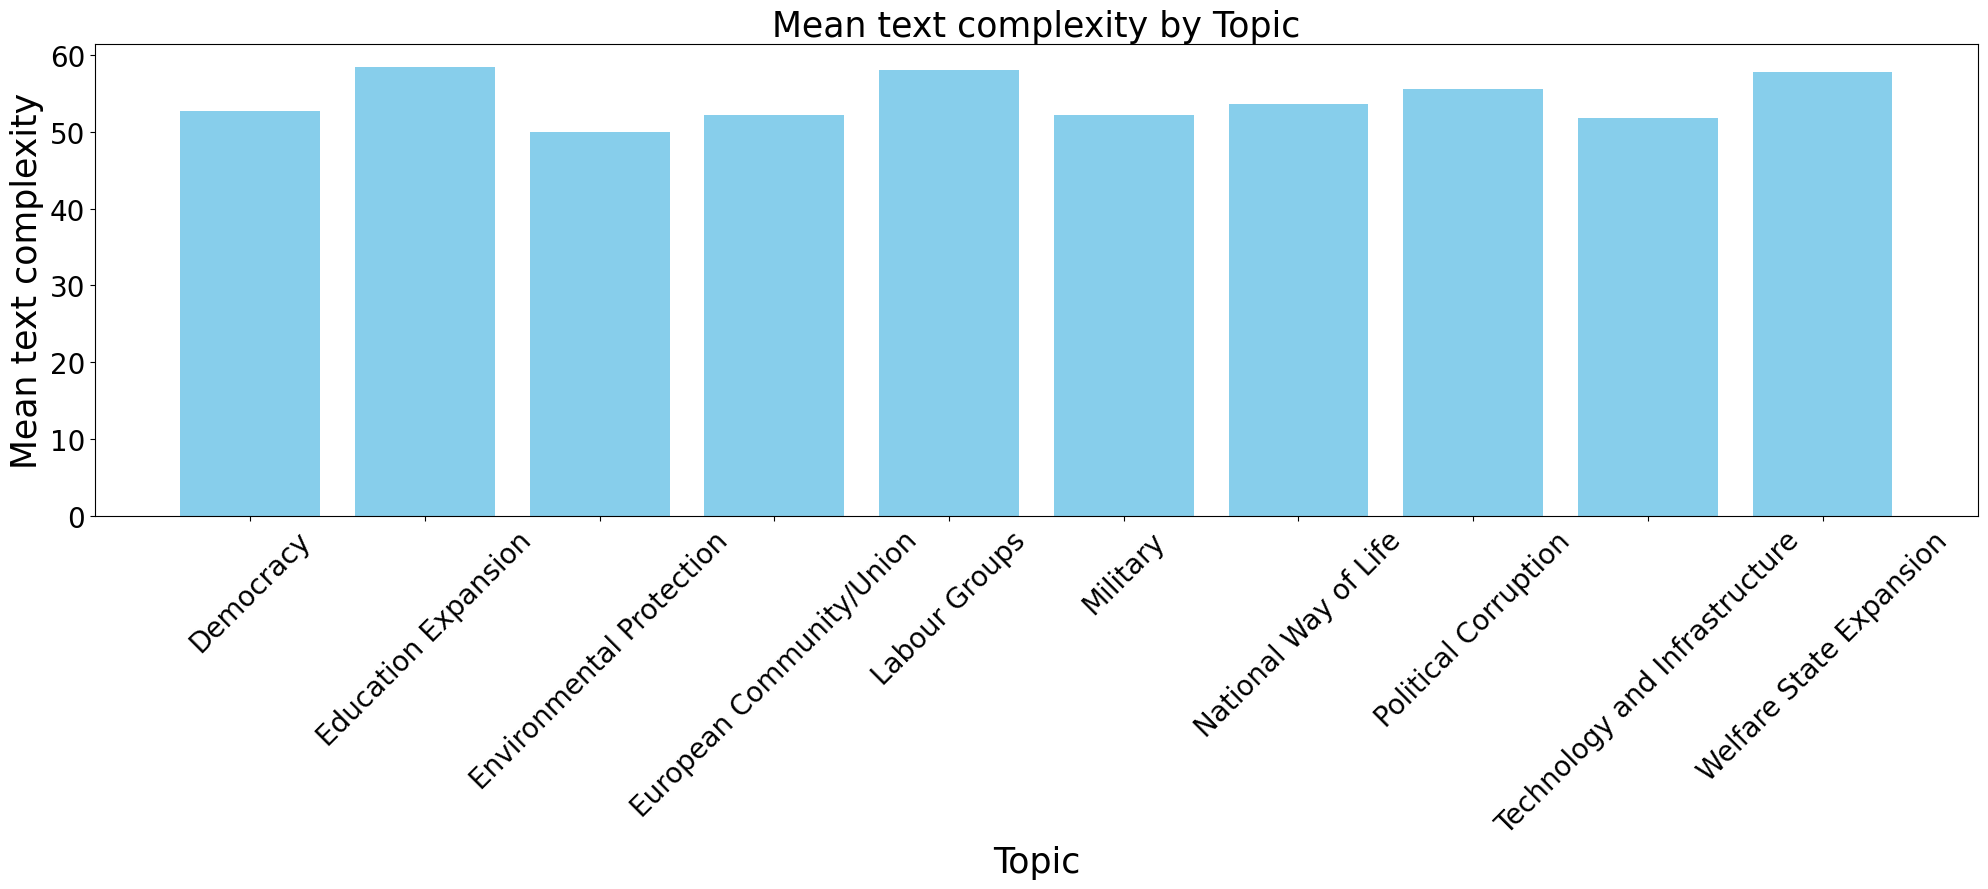

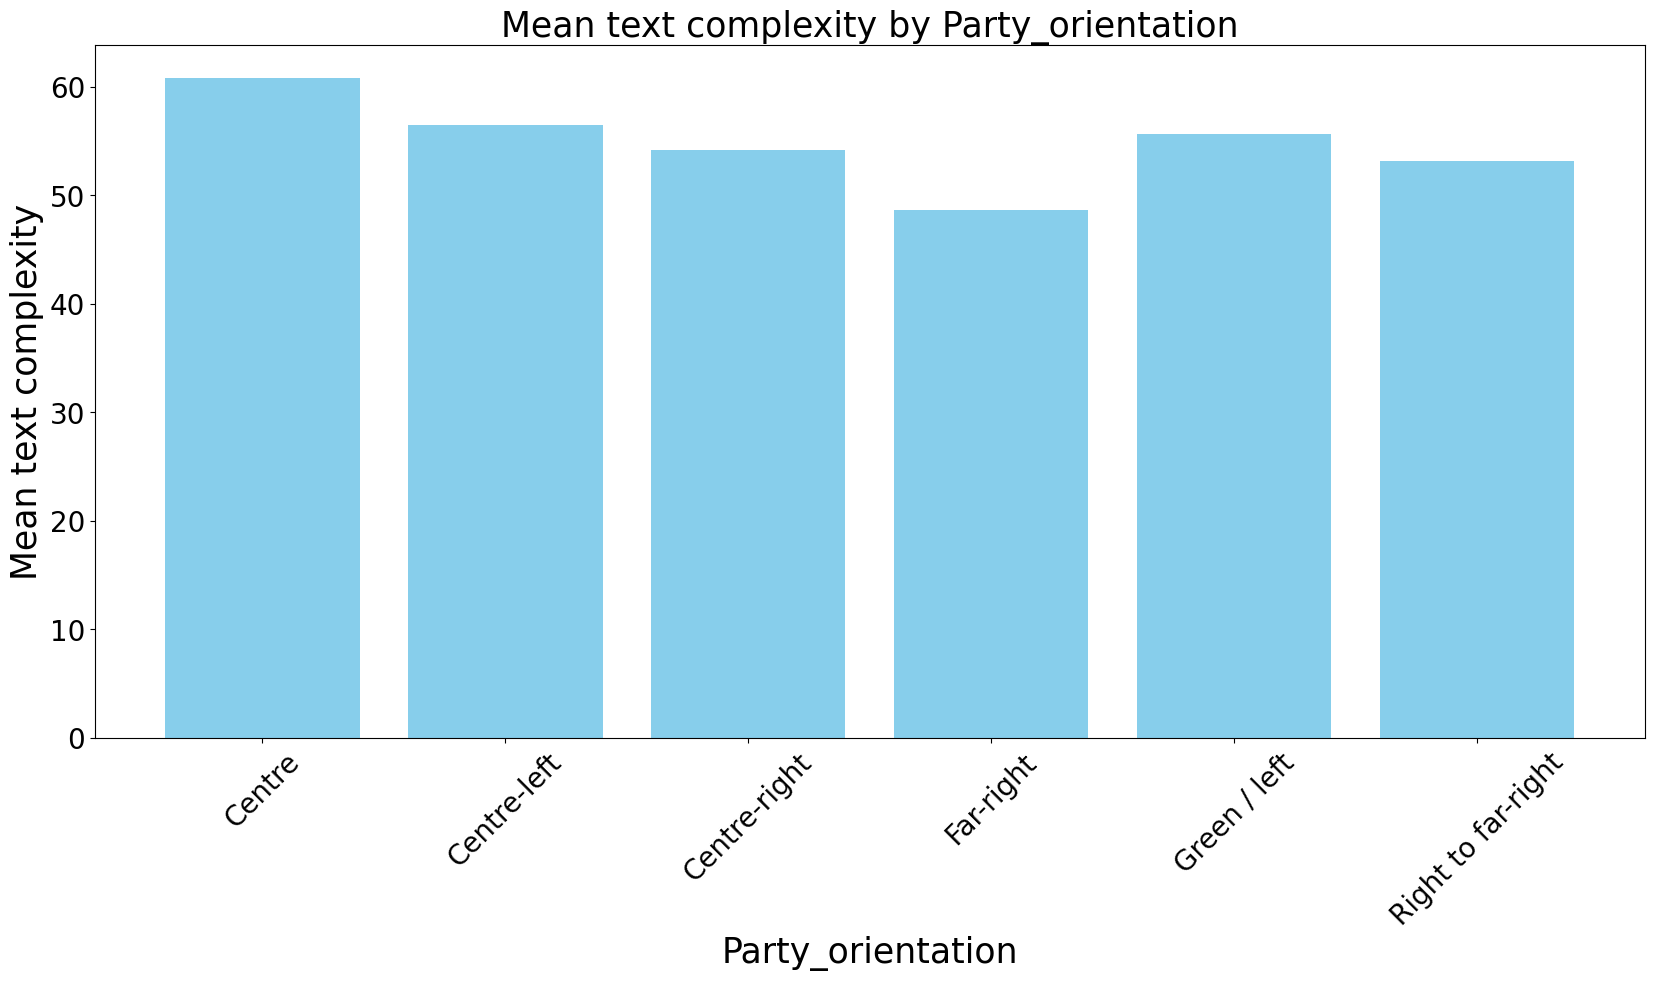

In [ ]:
import matplotlib.pyplot as plt

# Convert 'topic_primary_alt' to categorical if necessary
new_df['topic_primary_alt'] = new_df['topic_primary_alt'].astype('category')

# List of numeric columns to plot
#numeric_columns = ['flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog', 'ari', 'smog_index']
numeric_columns = ['flesch_reading_ease']

# Group by 'topic_primary_alt' and calculate the mean for each numeric column
mean_values = new_df.groupby('topic_primary_alt')[numeric_columns].mean().reset_index()

# Plot bar charts for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(20, 9))  # Increased width to 15
    plt.bar(mean_values['topic_primary_alt'], mean_values[column], color='skyblue')
    plt.xlabel('Topic', fontsize=25)
    plt.ylabel('Mean text complexity', fontsize=25)
    plt.title('Mean text complexity by Topic',fontsize=25)
    plt.xticks(rotation=45,fontsize=20)
    plt.yticks(fontsize=20)  # Increased fontsize for yticks    plt.tight_layout()
    plt.tight_layout()
    plt.show()


# Group by 'topic_primary_alt' and calculate the mean for each numeric column
mean_values = new_df.groupby('Party_orientation')[numeric_columns].mean().reset_index()

# Plot bar charts for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(20, 9))  # Increased width to 15
    plt.bar(mean_values['Party_orientation'], mean_values[column], color='skyblue')
    plt.xlabel('Party_orientation', fontsize=25)
    plt.ylabel('Mean text complexity', fontsize=25)
    plt.title('Mean text complexity by Party_orientation',fontsize=25 )
    plt.xticks(rotation=45, fontsize=20)  # Increased fontsize for xticks
    plt.yticks(fontsize=20)  # Increased fontsize for yticks    plt.tight_layout()
    plt.show()

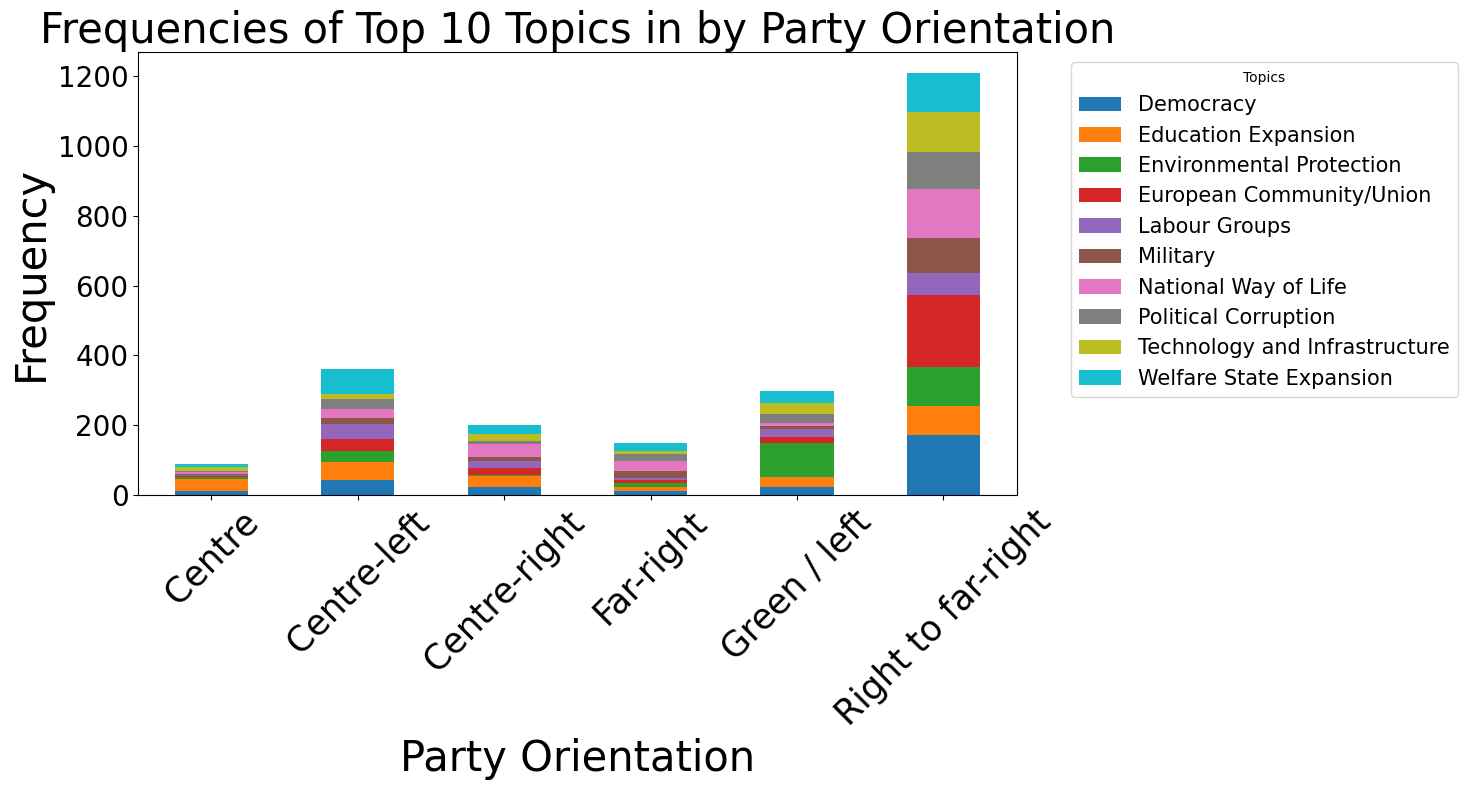

In [ ]:
new_df = new_df[(new_df['Party_orientation'].notna()) & (new_df['Party_orientation'] != '-')  & (new_df['topic_primary_alt'] != 'Political Authority')]

# Create a frequency table of topics by Party_orientation
frequency_table = new_df.groupby(['Party_orientation', 'topic_primary_alt']).size().unstack(fill_value=0)

# Plot bar charts for frequencies by Party_orientation
frequency_table.plot(kind='bar', figsize=(15, 8), stacked=True)
plt.xlabel('Party Orientation',fontsize=30)
plt.ylabel('Frequency',fontsize=30)
plt.title('Frequencies of Top 10 Topics in by Party Orientation',fontsize=30)
plt.xticks(rotation=45, fontsize=25)  # Increased fontsize for xticks
plt.yticks(fontsize=20)
# Increased fontsize for yticks
plt.tight_layout()
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=15)
plt.tight_layout()
plt.show()

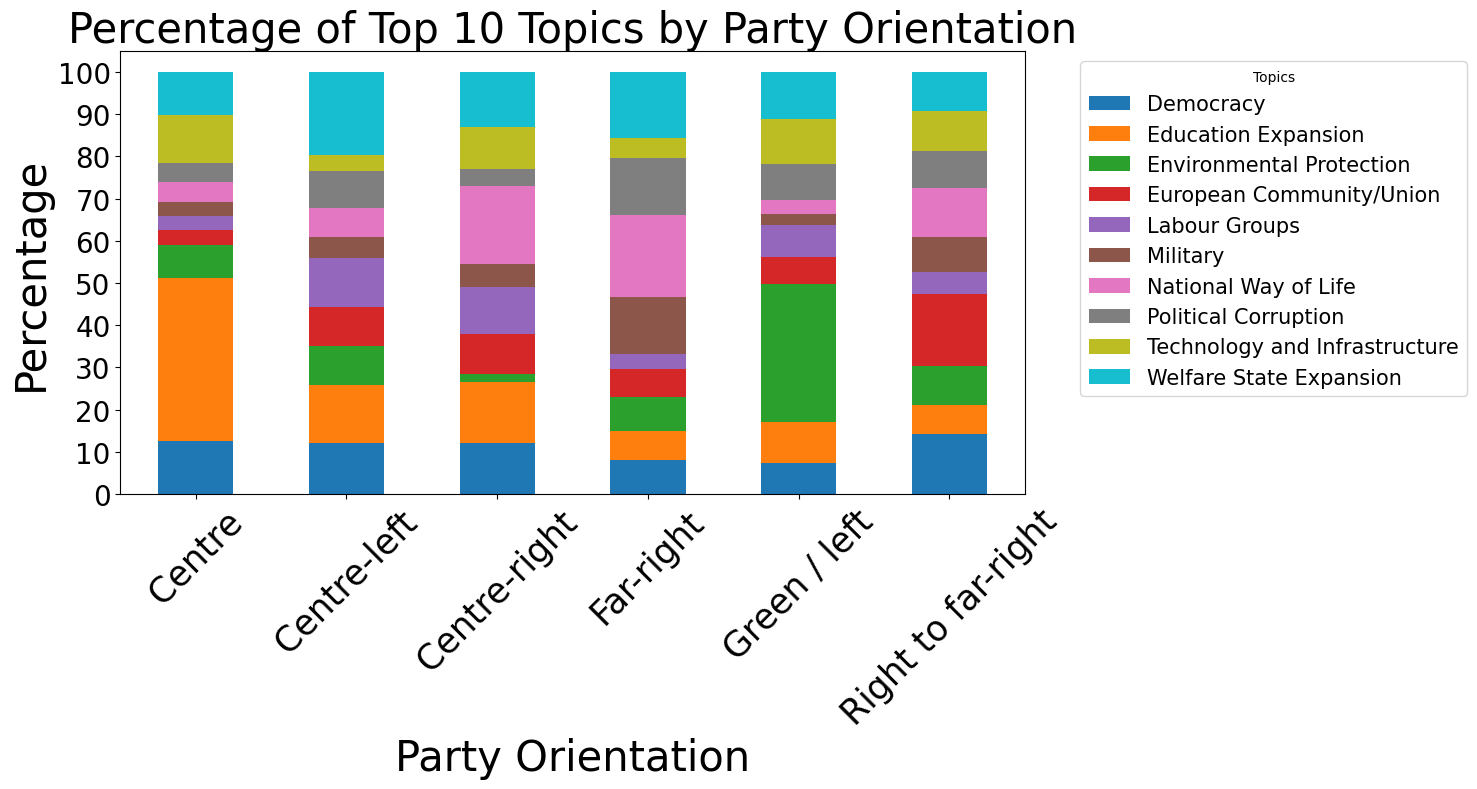

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame
new_df = new_df[(new_df['Party_orientation'].notna()) & (new_df['Party_orientation'] != '-') & (new_df['topic_primary_alt'] != 'Political Authority')]

# Create a frequency table of topics by Party_orientation
frequency_table = new_df.groupby(['Party_orientation', 'topic_primary_alt']).size().unstack(fill_value=0)

# Normalize the frequency table to get percentages
percentage_table = frequency_table.div(frequency_table.sum(axis=1), axis=0) * 100

# Plot bar charts for percentages by Party_orientation
percentage_table.plot(kind='bar', figsize=(15, 8), stacked=True)
plt.xlabel('Party Orientation',fontsize=30)
plt.ylabel('Percentage',fontsize=30)
plt.title('Percentage of Top 10 Topics by Party Orientation',fontsize=30)
plt.xticks(rotation=45,fontsize=25)
plt.yticks(range(0, 101, 10),fontsize=20)
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=15)
plt.tight_layout()
plt.show()


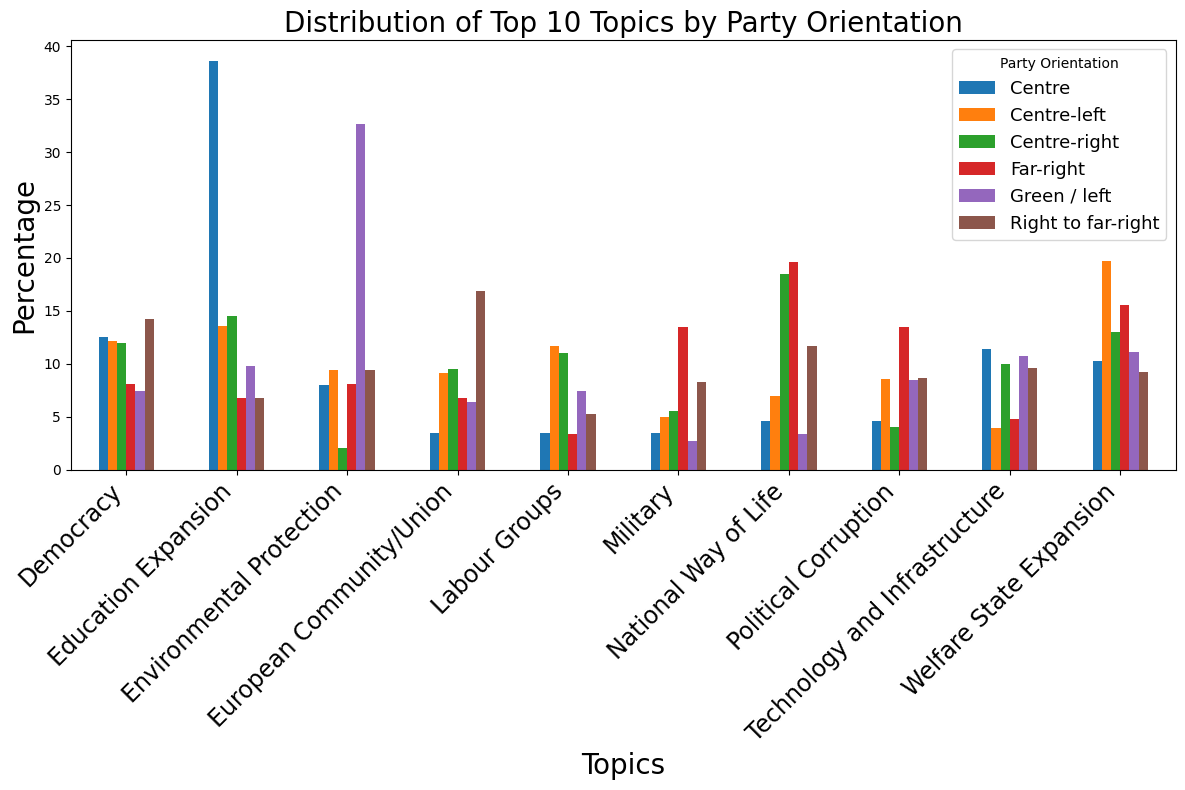

In [ ]:
new_df = new_df[(new_df['Party_orientation'].notna()) & (new_df['Party_orientation'] != '-') & (new_df['topic_primary_alt'] != 'Political Authority')]


# Task 1: Create a frequency table
freq_table = new_df.groupby('Party_orientation')['topic_primary_alt'].value_counts(normalize=True).unstack().fillna(0)
freq_table = freq_table * 100  # Convert to percentage
#print(freq_table)
# Task 2: Create a grouped bar chart
freq_table.T.plot(kind='bar', figsize=(12, 8))

plt.title('Distribution of Top 10 Topics by Party Orientation', fontsize = 20)
plt.xlabel('Topics', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)
plt.legend(title='Party Orientation', fontsize =13)
plt.xticks(rotation=45, ha='right', fontsize = 17)
plt.tight_layout()

plt.show()